## 2. 데이터프레임(DataFrame)
- 데이터프레임은 스프레드시트와 매우 유사한 표 형식을 취하느 데이터 구조이다.
- 시리즈는 각 요소에 연결된 레이블을 포함하는 인덱스 배열 형태(row index)를 지닌다.
- 데이터프레임은 두 개의 인덱스 배열(row index, column index)을 둔다.

#### DataFrame 생성방법
- 하나의 열이 되는 데이터를 리스트나 일차원 배열을 준비한다.
- 각각의 열에 대한 이름(라벨)을 키로 가지는 딕셔너리를 만든다.
- 이 데이터를 DataFrame 클래스 생성자의 첫번째 파라메터로 지정하고 열방향 인덱스는 columns 인수로, 행방향 인덱스는 index 인수로 지정한다.
- 데이터에 접근하려면 values 속성을 사용하고 열방향 인덱스와 행방향 인ㄷ게스는 각각 columns, index 속성으로 접근한다.
- 시리즈에서처럼 열방향 인덱스와 행방향 인덱스에 이름을 붙이는 것도 가능하다.

### 2-1. 데이터프레임 생성

In [2]:
import numpy as np
import pandas as pd

In [8]:
dict1 = {'이름' : ['철수', '영희', '일남'], '나이' : [19, 23, 26],
         '키' : [182, 175, 178]}

df1 = pd.DataFrame(dict1)
df1

,이름,나이,키
0,철수,19,182
1,영희,23,175
2,일남,26,178


In [12]:
# '이름' , '나이' 컬럼만 사용 할 경우
df2 = pd.DataFrame(dict1, columns=['이름', '나이'])
df2

,이름,나이
0,철수,19
1,영희,23
2,일남,26


In [14]:
# 인덱스 지정하기
df3 = pd.DataFrame(dict1, index=['일','이','삼'])
df3

,이름,나이,키
일,철수,19,182
이,영희,23,175
삼,일남,26,178


In [19]:
print(f'열 이름 출력 --> {df3.columns}')
print(f'인덱스 이름 출력 --> {df3.index}')
print(f'값 출력 --> \n {df3.values}')

열 이름 출력 --> Index(['이름', '나이', '키'], dtype='object')
인덱스 이름 출력 --> Index(['일', '이', '삼'], dtype='object')
값 출력 --> 
 [['철수' 19 182]
 ['영희' 23 175]
 ['일남' 26 178]]


### 2-2. 데이터 프레임 데이터 추출 loc 사용
- loc 속성(레이블 이름인 행, 열에 접근할 때 사용)

- 기본 데이터프레임
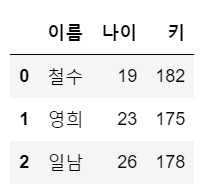

In [20]:
df1.loc[0]

이름     철수
나이     19
키     182
Name: 0, dtype: object

In [21]:
# 여러 개의 레이블 추출
df1.loc[[0, 1]]

,이름,나이,키
0,철수,19,182
1,영희,23,175


In [22]:
# 철수의 행 추출
df1[0:1]

,이름,나이,키
0,철수,19,182


In [25]:
# 일남의 나이 추출
df1['나이'][2]

26

### 2-2-1. 이름 속성을 이용하여 레이블 지정하기

In [26]:
df1.index.name='아이디'
df1.columns.name='사람'
df1

사람,이름,나이,키
아이디,,,
0,철수,19,182
1,영희,23,175
2,일남,26,178


### 2-3. del 명렁어와 T를 이용하여 열과 행 치환

In [38]:
# 체중 값 변경
df1['체중'] = [70, 68, 75]
df1

사람,이름,나이,키,체중
아이디,,,,
0,철수,20,182,70
1,영희,23,175,68
2,일남,26,178,75


In [28]:
# 나이 값 변경 -> 철수의 나이를 20으로 변경하시오
df1['나이'][0] = 20 
df1

<ipython-input-28-a57eae579b83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['나이'][0] = 20


사람,이름,나이,키,체중
아이디,,,,
0,철수,20,182,70
1,영희,23,175,68
2,일남,26,178,75


In [29]:
# 20과 영희의 값이 있으면 True, 나머지 False 반환
df1.isin([20, '영희'])

사람,이름,나이,키,체중
아이디,,,,
0,False,True,False,False
1,True,False,False,False
2,False,False,False,False


In [39]:
# 체중의 열 삭제
del df1['체중']
df1

사람,이름,나이,키
아이디,,,
0,철수,20,182
1,영희,23,175
2,일남,26,178


In [41]:
# 키가 176 이상인 데이터만 추출
print(df1['키'] > 176)

아이디
0     True
1    False
2     True
Name: 키, dtype: bool


In [43]:
# 열과 행을 치환
a = df1.T
a

아이디,0,1,2
사람,,,
이름,철수,영희,일남
나이,20,23,26
키,182,175,178


## 2-4 인덱스의 다양한 기능
### 2-4-1. 인덱스 변경
- 판다스 데이터 구조에서 선언된 인덱스 개체는 변경할 수 없다.
- reindex() 함수를 통해 인덱스를 삭제, 수정, 삽입 할 수 있다.

In [44]:
ser1 = pd.Series([10, 5, 31, 13], index=['B','D','A','C'])
ser1

B    10
D     5
A    31
C    13
dtype: int64

In [48]:
# 인덱스 변경
ser1_a = ser1.reindex(['a','b','c','d'])
ser1_a

a   NaN
b   NaN
c   NaN
d   NaN
dtype: float64

In [61]:
# 변경된 인덱스의 값이 NaN으로 채워졌지만 method를 활용하여 해결할 수 있다.
ser1 = pd.Series([10, 5, 31, 13], index=[1,2,3,4])
ser1_b = ser1.reindex(range(5), method='ffill')
ser1_b

0     NaN
1    10.0
2     5.0
3    31.0
4    13.0
dtype: float64

### 2-4-2. 삭제 drop() 함수
- 시리즈

In [63]:
# 시리즈
a = pd.Series(np.arange(3.), index=['농구', '축구', '야구'])
a

농구    0.0
축구    1.0
야구    2.0
dtype: float64

In [64]:
# 야구 삭제
a.drop(['야구'])

농구    0.0
축구    1.0
dtype: float64

In [67]:
# 야구, 농구 삭제
a.drop(['야구','농구'])

축구    1.0
dtype: float64

- 데이터프레임

In [68]:
# 데이터프레임 생성
df2 = pd.DataFrame(np.arange(91,100).reshape((3,3)),
                   index=['철수','영희','일남'],
                  columns=['수학','과학','영어'])
df2

,수학,과학,영어
철수,91,92,93
영희,94,95,96
일남,97,98,99


In [76]:
# 행 기준으로 철수, 영희 삭제
b = df2.drop(['철수','영희'], axis=0)
b

,수학,과학,영어
일남,97,98,99


In [78]:
# 열 기준으로 수학, 과학 삭제
c = df2.drop(['수학','과학'], axis=1)
c

,영어
철수,93
영희,96
일남,99


### 2-4-3. 산술 및 정렬
- 시리즈

In [79]:
ser1 = pd.Series([10, 20, 30], index=['축구', '농구','족구'])
ser2 = pd.Series([20, 50, 40], index=['축구', '농구','야구'])

ser1+ser2
# ser1, ser2에 공통으로 존재하는 컬럼만 더하고, 그렇지 않은 경우 NaN을 반환

농구    70.0
야구     NaN
족구     NaN
축구    30.0
dtype: float64

- 데이터프레임

In [81]:
df3 = pd.DataFrame(np.arange(91,100).reshape((3,3)),
                   index=['철수','영희','일남'],
                  columns=['수학','과학','영어'])

df4 = pd.DataFrame(np.arange(71,80).reshape((3,3)),
                   index=['우영','영희','일남'],
                  columns=['수학','과학','영어'])

df3+df4

,수학,과학,영어
영희,168.0,170.0,172.0
우영,NaN,NaN,NaN
일남,174.0,176.0,178.0
철수,NaN,NaN,NaN


## 2-5. 데이터 구조 사이에서의 연산
### 2-5-1. 기본산술법
- add()
- sub()
- mul()
- div()

In [82]:
df3.add(df4)

,수학,과학,영어
영희,168.0,170.0,172.0
우영,NaN,NaN,NaN
일남,174.0,176.0,178.0
철수,NaN,NaN,NaN


### 2-5-2. 연산 함수 요소별 적용

In [84]:
np.sqrt(df3)

,수학,과학,영어
철수,9.539392,9.591663,9.643651
영희,9.695360,9.746794,9.797959
일남,9.848858,9.899495,9.949874


### 2-5-3. 통계 함수


In [85]:
df3.describe()

,수학,과학,영어
count,3.0,3.0,3.0
mean,94.0,95.0,96.0
std,3.0,3.0,3.0
min,91.0,92.0,93.0
25%,92.5,93.5,94.5
50%,94.0,95.0,96.0
75%,95.5,96.5,97.5
max,97.0,98.0,99.0


### 2-5-4. 정렬과 순위- sort(), sort_index(), sort_values(), rank()

In [93]:
df3 = pd.DataFrame(np.arange(91,100).reshape((3,3)),
                   index=['철수','영희','일남'],
                  columns=['수학','과학','영어'])
df3

,수학,과학,영어
철수,91,92,93
영희,94,95,96
일남,97,98,99


In [94]:
# 오름차순 정렬
df3.sort_index()

,수학,과학,영어
영희,94,95,96
일남,97,98,99
철수,91,92,93


In [95]:
# 내림차순 정렬
df3.sort_index(ascending=False)

,수학,과학,영어
철수,91,92,93
일남,97,98,99
영희,94,95,96


In [96]:
# 열로 정렬하고 싶다면
df3.sort_index(axis=1)

,과학,수학,영어
철수,92,91,93
영희,95,94,96
일남,98,97,99


In [97]:
# 값 정렬
df3.sort_values(by='수학', ascending=False)

,수학,과학,영어
일남,97,98,99
영희,94,95,96
철수,91,92,93


In [99]:
# 순위
df3.rank(ascending=False)

,수학,과학,영어
철수,3.0,3.0,3.0
영희,2.0,2.0,2.0
일남,1.0,1.0,1.0


### 2-5-5. 상관관계와 공분산(Correlation and Covariance)

In [100]:
# 상관관계
df3.corr()

,수학,과학,영어
수학,1.0,1.0,1.0
과학,1.0,1.0,1.0
영어,1.0,1.0,1.0


In [101]:
# 공분산
df3.cov()

,수학,과학,영어
수학,9.0,9.0,9.0
과학,9.0,9.0,9.0
영어,9.0,9.0,9.0


In [102]:
# corrwith() 함수를 통한 쌍별 상관관계
# 시리즈, 데이터프레임 모두 가능

df4 = pd.DataFrame(np.arange(91,100).reshape((3,3)),
                   index=['철수','영희','일남'],
                  columns=['국어','영어','수학'])
ser4 = pd.Series([80, 60, 70], index=['철수','영희','일남'])

df4.corrwith(ser4)

국어   -0.5
영어   -0.5
수학   -0.5
dtype: float64